# Perceptron implementation

This code demonstrates basic implementation of a perceptron using NumPy and Pandas packages.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from perceptron import (
    network_init,
    generate_data,
    get_weighted_sum,
    sigmoid,
    confusion_matrix,
    forward_prop,
    cross_entropy
)

#print(help(generate_data))
#print(help(get_weighted_sum))
#print(help(sigmoid))
#print(help(confusion_matrix))

In [2]:
n_features = 3
m_examples = 15
data = generate_data(m_examples, n_features, seed=29)
print('Features and labels matrix:\n---------------------------\n')
print(data, '\n\n---------------------------')
X = data.drop(columns=['targets']).values
Y = data['targets'].values
print(f'Number of features: {X.shape[1]}')
print(f'Number of training examples: {X.shape[0]}')

Features and labels matrix:
---------------------------

          x0        x1        x2  targets
0   0.050047  0.506322  0.519234        1
1   0.265203  0.129222  0.020731        1
2   0.393828  0.380229  0.023452        1
3   0.238212  0.788106  0.617595        1
4   0.982793  0.861112  0.631429        1
5   0.186492  0.841894  0.421253        1
6   0.028407  0.952240  0.943834        0
7   0.321769  0.493433  0.272774        0
8   0.760770  0.971630  0.608703        1
9   0.613694  0.231440  0.268094        0
10  0.381394  0.568859  0.732517        1
11  0.047114  0.561463  0.966119        0
12  0.218823  0.417570  0.043238        1
13  0.792898  0.160876  0.658430        1
14  0.236390  0.945161  0.873438        0 

---------------------------
Number of features: 3
Number of training examples: 15


In [9]:
seed_init=False
weights, bias = network_init(n_features, seed=seed_init)
print('Initial network parameters:')
for i in range(len(weights)):
    print(f'w{i} = {weights[i]}')
print(f'b = {bias}')

Initial network parameters:
w0 = 0.6369616873214543
w1 = 0.2697867137638703
w2 = 0.04097352393619469
b = 0


# Forward propagation

In this section, forward propagation through the perceptron is performed 

In [10]:
Y_hat, weighted_sums, sigmoids = forward_prop(X, weights, bias)
initial_pass = pd.DataFrame({'weighted_sum':weighted_sums, 'Y':Y, 'Y_hat':Y_hat, 'sigmoid':sigmoids,})
acc_init = (initial_pass['Y'] == initial_pass['Y_hat']).mean()
print(f'Initial forward propagation results (acc={acc_init:.2f}):\n---------------------------\n')
print(initial_pass)

Initial forward propagation results (acc=0.67):
---------------------------

    weighted_sum  Y  Y_hat   sigmoid
0       0.189752  1      1  0.547296
1       0.204636  1      1  0.550981
2       0.354395  1      1  0.587683
3       0.389657  1      1  0.596200
4       0.884190  1      1  0.707690
5       0.363180  1      1  0.589810
6       0.313668  0      1  0.577780
7       0.349253  0      1  0.586436
8       0.771655  1      1  0.683879
9       0.464324  0      1  0.614039
10      0.426418  1      1  0.605018
11      0.221070  0      1  0.555044
12      0.253808  1      1  0.563114
13      0.575426  1      1  0.640014
14      0.441351  0      1  0.608581


## Cross-entropy loss

In [12]:
cross_entropy_cost = cross_entropy(Y, sigmoids)
initial_pass_with_cost = initial_pass.copy()
initial_pass_with_cost.drop(columns=['weighted_sum'], inplace=True)
initial_pass_with_cost['c-e loss'] = cross_entropy_cost
print(initial_pass_with_cost)

    Y  Y_hat   sigmoid  c-e loss
0   1      1  0.547296  0.261778
1   1      1  0.550981  0.258863
2   1      1  0.587683  0.230857
3   1      1  0.596200  0.224608
4   1      1  0.707690  0.150157
5   1      1  0.589810  0.229288
6   0      1  0.577780  0.374461
7   0      1  0.586436  0.383458
8   1      1  0.683879  0.165021
9   0      1  0.614039  0.413457
10  1      1  0.605018  0.218232
11  0      1  0.555044  0.351683
12  1      1  0.563114  0.249404
13  1      1  0.640014  0.193810
14  0      1  0.608581  0.407358


## Network training

This training algorithm updates weights and bias after each pass through the training data. It means, that after each training example, weights and bias are updated.

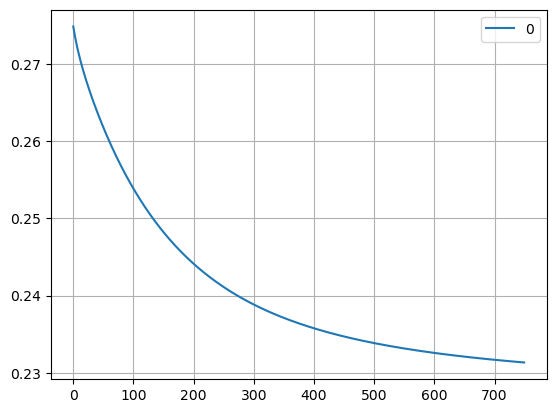

In [13]:
learning_rate = 0.1
epochs = 750

def cross_entropy_loss(y, y_hat):
    return -(y*np.log10(y_hat) + (1-y)*np.log10(1-y_hat))

def update_weights(weights, alpha, target, prediction, feature):
    return [w + alpha*(target-prediction)*x for x, w in zip(feature, weights)]

def update_bias(bias, alpha, y, y_hat):
    return bias + alpha*(y-y_hat)
        
def train_model(X, Y, alpha=0.01, n_epoch=100):
    W, b = network_init(n_features, seed=seed_init)
    epoch_cost = []
    for e in range(n_epoch):
        m = X.shape[0]
        individual_loss = []
        for i in range(m):
            x = X[i]
            y = Y[i]
            w_sum = get_weighted_sum(x, W, b)
            y_hat = sigmoid(w_sum)
            loss = cross_entropy_loss(y, y_hat)
            individual_loss.append(loss)
            # gradient descent
            W = update_weights(W, alpha, y, y_hat, x)
            b = update_bias(b, alpha, Y[i], y_hat)
        average_cost = sum(individual_loss)/len(individual_loss)
        epoch_cost.append(average_cost)
    return W, b, epoch_cost
        
final_weights, final_bias, epoch_cost = train_model(X, Y, n_epoch=epochs)

training_data = pd.DataFrame(epoch_cost)
training_data_plot = training_data.plot(kind="line", grid=True)
training_data_plot;

In [15]:
Y_hat_final, weighted_sums_final, _ = forward_prop(X, final_weights, final_bias)
final_pass = pd.DataFrame({'weighted_sum':weighted_sums_final, 'Y':Y, 'Y_hat':Y_hat_final})
acc_final = (final_pass['Y'] == final_pass['Y_hat']).mean()
print(f'Final forward propagation results (acc={acc_final:.2f}):\n---------------------------\n')
print(final_pass)

Final forward propagation results (acc=0.87):
---------------------------

    weighted_sum  Y  Y_hat
0       0.055266  1      1
1       1.430454  1      1
2       1.803599  1      1
3       0.356157  1      1
4       1.909057  1      1
5       0.703180  1      1
6      -0.724153  0      0
7       1.156457  0      1
8       1.545434  1      1
9       1.658723  0      1
10      0.305045  1      1
11     -0.907216  0      0
12      1.412191  1      1
13      1.144043  1      1
14     -0.139572  0      0


In [16]:
print(confusion_matrix(Y, Y_hat_final))

[[10.  0.]
 [ 2.  3.]]


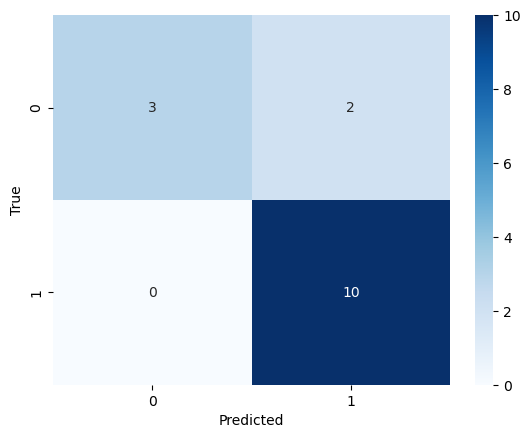

In [39]:
# Plot the confusion matrix using seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y, Y_hat_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

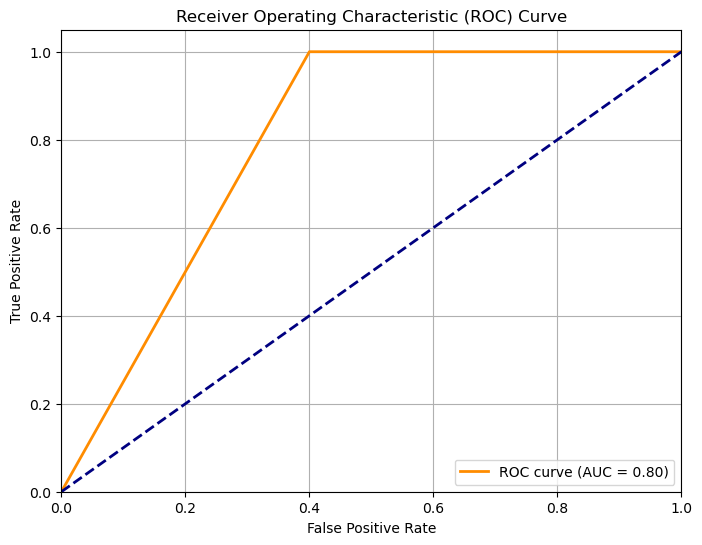

In [36]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y, Y_hat_final)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()